<p><h2 style="color:black">First things first</h2><p>
I am going explore the data-set to see what interesting features i can target in this first analysis. I will be using this notebook as a "sand-box". This process will give me an idea of what functions i need to create in order to manipulate my data-set.</p>
<h6 style="color:green">
    Lets start by importing the dataset. This data-set was scraped from <a href="http://ufcstats.com">http://www.ufcstats.com</a> using the <a style="color:red">ufc_extraction.py</a> script in this project. This script scrapes fighter statistics and stores them in a <a style="color:red"> .json</a> file. 

In [81]:
from src.data.dataMakers import dataMakers
dm = dataMakers()
fighterFrame = dm.make()
fighterFrame.head()

,dob,draws,height,losses,name,reach,sapm,slpm,stance,stracc,strdef,subavg,tdacc,tdavg,tddef,url,weight,wins
0,7-13-1978,3,NaN,0,Tom Aaron,NaN,0.00,0.00,None,0.0,0.0,0.0,0.0,0.00,0.0,http://ufcstats.com/fighter-details/93fe7332d1...,155.0,5
1,7-03-1983,6,5.92,0,Danny Abbadi,NaN,4.41,3.29,Orthodox,38.0,57.0,0.0,0.0,0.00,77.0,http://ufcstats.com/fighter-details/15df64c02b...,155.0,4
2,None,14,6.00,0,David Abbott,NaN,3.55,1.35,Switch,30.0,38.0,0.0,33.0,1.07,66.0,http://ufcstats.com/fighter-details/b361180739...,265.0,10
3,9-02-1981,4,6.25,0,Shamil Abdurakhimov,76.0,2.36,2.64,Orthodox,44.0,60.0,0.2,24.0,1.34,66.0,http://ufcstats.com/fighter-details/2f5cbecbbe...,235.0,20
4,None,14,5.50,0,Hiroyuki Abe,NaN,3.11,1.71,Orthodox,36.0,63.0,0.0,0.0,0.00,33.0,http://ufcstats.com/fighter-details/c0ed7b2081...,145.0,8


<p><h6 style="color:green">Great! we can print out the fighters which means the <a style="color:red">make()</a> function from the <a style="color:red">make_dataset</a> class is running smoothly. All this function does is extract the data from the  <a style="color:red">fighters.json</a> file.</p> Now lets explore the size of this list. AKA the number of fighters in the data-set. 

In [91]:
len(fighterFrame)

3323

<h6 style="color:green">
    We can see that the data-set is not absurdly large, therefore
    we can use a simple <a style="color:red"> Pandas DataFrame </a> to manipulate this data.
</h6>

<h2 style="color:black">
    First question: how does the distribution of fighters's weight division look like?
</h2>
<ul>
    <li>Flyweight: 115-125 lbs</li>
    <li>Bantamweight: 125-135 lbs</li>
    <li>Featherweight: 135-145 lbs</li>
    <li>Lightweight 145-155 lbs</li>
    <li>Welterweight 155-170 lbs</li>
    <li>Middleweight: 170-185 lbs</li>
    <li>Light Heavyweight: 185-205 lbs</li>
    <li>Heavyweight: 205-265 lbs</li>
</ul>
<h6 style="color:green">Lets create a <a style="color:red"> Pandas DataFrame</a> that stores the count of each subdivision.
We start by creating subsets of the original fighterFrame based on the weight division limits and then couting the items on each subset.<h6>

In [92]:
#Creating the subsets of data based on weight division
import pandas as pd
import seaborn as sns
import numpy as np

#replaces matplotlib's settings with seaborn's default settings which are often more aesthetically pleasing 
sns.set()


flyWeights = fighterFrame[(fighterFrame['weight'] >= 115)&(fighterFrame['weight'] < 125)]
bantamWeights = fighterFrame[(fighterFrame['weight'] >= 125)&(fighterFrame['weight'] < 135)]
featherWeights = fighterFrame[(fighterFrame['weight'] >= 135)&(fighterFrame['weight'] < 145)]
lightWeights = fighterFrame[(fighterFrame['weight'] >= 145)&(fighterFrame['weight'] < 155)]
welterWeights = fighterFrame[(fighterFrame['weight'] >= 155)&(fighterFrame['weight'] < 170)]
middleWeights = fighterFrame[(fighterFrame['weight'] >= 170)&(fighterFrame['weight'] < 185)]
lightHeavyWeights = fighterFrame[(fighterFrame['weight'] >= 185)&(fighterFrame['weight'] < 205)]
heavyWeights = fighterFrame[(fighterFrame['weight'] >= 205)&(fighterFrame['weight'] < 265)]

#creating a pandas dataFrame to store the count of each fighting division

division_labels = ['fly-weight','bantam-weight','feather-weight','light-weight','welter-weight',
                   'middle-weight','light-heavy-weight','heavy-weight']

division_counts = [len(flyWeights),len(bantamWeights),len(featherWeights),len(lightWeights),
                   len(welterWeights), len(middleWeights),len(lightHeavyWeights),len(heavyWeights)]

division_count_frame = pd.DataFrame(division_counts,index=division_labels)

<h6 style="color:green">
    Great, we killed 2 birds with one stone. We have the counts for each weight-division AND we created a <a style="color:red"> pandas DataFrame</a> object of each sub-division. These subsets are going be very useful in future analysis.
</h6>
<h6 style="color:green">
    Now that we have created a <a style="color:red">division_count_frame</a> we can easily plot the values.
</h6>

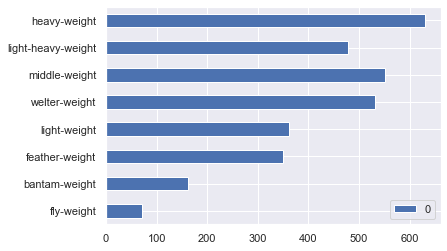

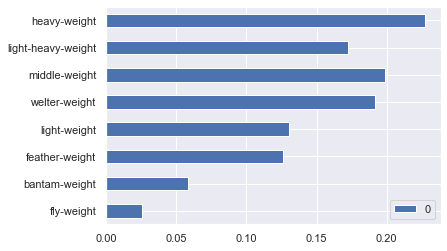

In [93]:
#graphing raw values
division_count_frame.plot.barh()

#graphing proportion the values
total_fighters = len(flyWeights)+len(bantamWeights)+len(featherWeights)+ len(welterWeights)+ len(middleWeights)+len(lightHeavyWeights)+len(heavyWeights)
division_count_frame.apply(lambda x:(x)/(total_fighters)).plot.barh()


<h6 style="color:green">
    It will help if i print out both plots; the raw value and the proportion of each fighting class. This will give me the ability to explore the data from different perspectives and consequently allows me to ask different questions about the same set.  
</h6>



Interesting! we see that the most common weight division is welter-weight and the smallest division is fly-weight.
A generalized conclusion would be that heavier weight divisions tend to have a larger amount of fighters than lighter divisions.

In [94]:
len(heavyWeights)/len(flyWeights)

8.873239436619718

There are 8.9 times more fighters in the heavy-weight division than in the fly-weight division. Thats quite a difference!

<h6 style="color:green">
    We have scratched the surface of this data-set, now lets dive in deeper.
</h6>

<h2 style="color:black">
    Second Question: How does height distribution look like? and how does it look like in each sub-division?
</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a196b0f98>]],
      dtype=object)

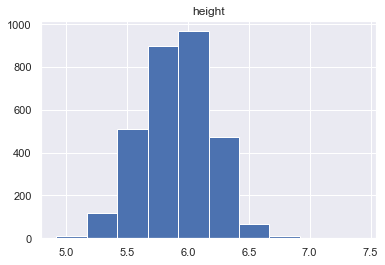

In [95]:
heightFrame =  pd.DataFrame(fighterFrame['height'])
heightFrame.hist(bins=10)

<h6 style="color:green">
    We can see in this 10-bin histogram that the most common heights in the UFC
    fall between 5.9 and 6.2 feet. This is interesting but too general; a better
    analysis would be to plot the height distribution of each fighting class.
</h6>
<h6 style="color:green">
    Now lets apply the same procedure but to each individual set.
</h6>
<h6 style="color:green"></h6>


<p>Fly-weight</p> 

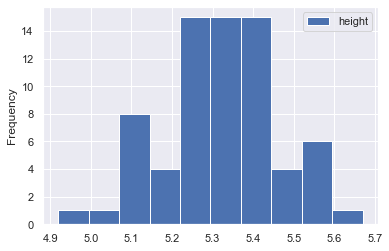

In [134]:
pd.DataFrame(flyWeights['height']).plot.hist(bins=10)

<p>Bantam-weight</p>

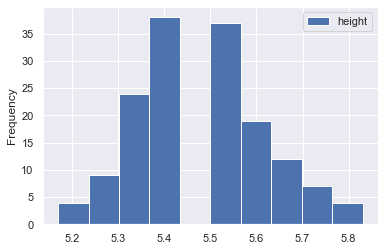

In [133]:
pd.DataFrame(bantamWeights['height']).plot.hist(bins=10)

<p>Feather-weight</p> 

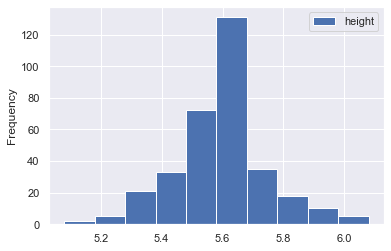

In [132]:
pd.DataFrame(featherWeights['height']).plot.hist(bins=10)

<p>Light-weight</p> 

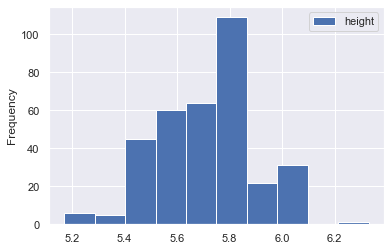

In [131]:
pd.DataFrame(lightWeights['height']).plot.hist(bins=10)

<p>Welter-weight</p> 

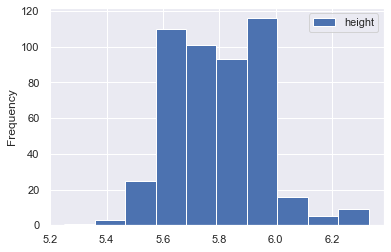

In [130]:
pd.DataFrame(welterWeights['height']).plot.hist(bins=10)

<p>Welter-weight</p> 

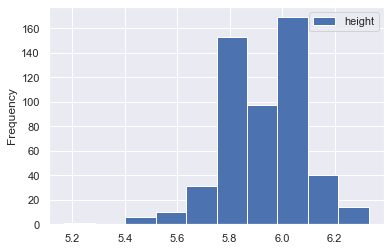

In [129]:
pd.DataFrame(middleWeights['height']).plot.hist(bins=10)

<p>Welter-weight</p> 

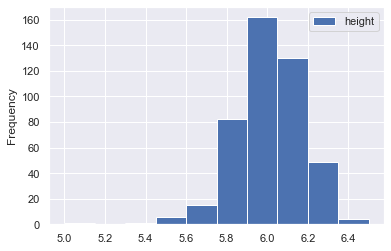

In [128]:
pd.DataFrame(lightHeavyWeights['height']).plot.hist(bins=10)

<p>Welter-weight</p> 

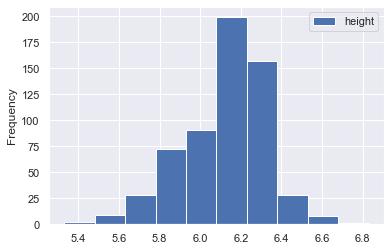

In [127]:
pd.DataFrame(heavyWeights['height']).plot.hist(bins=10)

<h6 style="color:green">
    
</h6>